In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.signal
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [ ]:
k=0
N=1
scipy.stats.rice(k).rvs((N,2))


array([[0.57976444, 1.86000671]])

### Perfect CSI

In [ ]:
np.linalg.inv(np.array([[2,2,2],[2,1,3],[0,0,2]]))

array([[-0.5,  1. , -1. ],
       [ 1. , -1. ,  0.5],
       [ 0. ,  0. ,  0.5]])

In [ ]:
M = 10 # Number of Antennaes
N = 100 # Number of reflecting elements
T = 1 # Training sequence length
s_e = np.random.normal(size=(M,T))       
s_i = np.random.normal(size=(M,T))
s_i = s_i/np.linalg.norm(s_i,axis=0)

def generate_rice(k,beta,hd):
    hs=np.random.normal(hd.shape)+ j*np.random.normal(hd.shape)
    return hd*np.root(beta*(k/k+1))+ hs*np.root(beta/k+1)
    

theta=np.ones(N) ## ALL ON - HOW 
G =  scipy.stats.rice(k).rvs((M,N))  # MxN
h_de = scipy.stats.rice(k).rvs(M) # Mx1
h_di = scipy.stats.rice(k).rvs(M) # Mx1
h_re = scipy.stats.rice(k).rvs(N)   # Nx1
h_ri = scipy.stats.rice(k).rvs(N)  # Nx1
# What are pre-coding vectors?

h_e= h_de.conj().T  + h_re.conj().T@np.diag(theta)@G.conj().T  # 1xM 
h_i=  h_di.conj().T  + h_ri.conj().T@np.diag(theta)@G.conj().T # 1xM 
w=h_e.copy()
v=h_i.copy()
x=w@s_e + v@s_i


In [ ]:
generate_rice

<function __main__.generate_rice(k, beta, hd)>

In [ ]:
sigma=0.02
sinr = np.linalg.norm(h_i.conj().T@w)/(np.linalg.norm(h_i.conj().T@v)+sigma**2)  
er =  np.linalg.norm(h_e.conj().T@(w+v))
# Fix a threshold
# Probability that both these fall below a threshold


In [ ]:
er

502252.3893680593

In [ ]:
sinr

0.9800613062081671

In [ ]:
np.sqrt(1)

1.0

In [ ]:
yv,xv=np.meshgrid(np.arange(5),np.arange(5), sparse=False, indexing='ij')

In [ ]:
np.sqrt(xv**2+yv**2)

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

In [ ]:
# Single User 

In [ ]:
for i,j in zip(np.arange(1,11),np.arange(1,11)*np.arange(1,11)):
    print(i,j)

1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81
10 100


### Base Code for functions to simulate IRS Network

#### TODO
- [ ] Add Parameter for Distance from/to IRS

In [ ]:
generate_rice(1,10**-6,)

In [ ]:
M = 10 # Number of Antennaes
T = 1 # sequence length
s_e = np.ones(shape=(M,T))*10**-3 # What should the energy part of the signal be like?
s_i =  np.ones(shape=(M,T))*10**-3
#s_i = s_i/np.linalg.norm(s_i,axis=0)
# Change it to M=1

def generate_rice(k,beta,hd):
    # Does rician have both components as well?
    hs=np.random.normal(size=hd.shape)+1j*np.random.normal(size=hd.shape)
    return hd*np.sqrt((beta*k / (k+1))) + (hs*np.sqrt((beta / (k+1)))/np.sqrt(2))

def theta_direct(N,phi=np.pi/3,d=0.06): 
    # What does phi mean again
    return 2*np.pi*d* np.arange(1,N+1)*np.cos(phi)

def theta_reflector(Nx,Ny,phi=np.pi/3,d=0.06/4): 
    # Nx = Number of columns in IRS
    # Ny = Number of rows
    # What is the significance of Phi here?
    yv,xv=np.meshgrid(np.arange(Nx),np.arange(Ny), sparse=False, indexing='ij')
    dist=np.sqrt(xv**2+yv**2)
    return 2*np.pi*d*dist *np.cos(phi)

def generate_deterministic_direct(antenna_gains):
    
    alphas=np.sqrt(antenna_gains)
    return np.exp(1j*theta_direct(antenna_gains.shape[0]))*alphas

def generate_deterministic_reflectors(antenna_gains):
    alphas=np.sqrt(antenna_gains)
    return np.exp(1j*theta_reflector(antenna_gains.shape[0],antenna_gains.shape[1]))*alphas

def simulate_irs(Nx=10,Ny=10,M=10,T=1,n_sim=1000,a=0.5,k_e_r=1):
    s_e = np.ones(shape=(M,T))*(10**-3)*(1-a)
    s_i = np.ones(shape=(M,T))*10**-3 *a
    
    sinr=np.zeros(n_sim)
    er=np.zeros(n_sim)
    for i in range(n_sim):
        N=Nx*Ny
        theta=np.ones((Nx,Ny)) ## ALL ON - HOW 
        
        # What should the pattern be like?
        G =  scipy.stats.rice(k).rvs((M,N))  # MxN BS-PIS
        # G should also be rician but with what deterministic component?
        alpha_bs_e= np.ones(M)
        alpha_bs_i= np.ones(M)
        
        # What can be other possible alphas?
        # Will these alpha be different for both? Will theta be different?
        # What do we do with the phases of the antennas and their gains?
        d=1.5
        # What should be the different rice and path loss factors?

        h_e_Det_d =generate_deterministic_direct(alpha_bs_e)
        # Deterministic Direct Channel to EH
        # Path loss factor
        beta_e_d = 10**-3*(10)**-3
        # Rice factor
        k_e_d= 0

        h_e_Det_r = generate_deterministic_reflectors(theta).flatten()# Deterministic Reflected Array channel to EH
        beta_e_r = 10**-3*(d)**-3
        k_e_r =1

        h_i_Det_d =  generate_deterministic_direct(alpha_bs_i) # Deterministic Direct Channel to IS
        beta_i_d=10**-3* (10)**-3
        k_i_d=0
                                
        h_i_Det_r= generate_deterministic_reflectors(theta).flatten() # Deterministic Reflected Array channel to IS
        beta_i_r=10**-3* (d)**-3
        k_i_r=1


        h_de =  generate_rice(k_e_d,beta_e_d,h_e_Det_d) # Mx1
        h_re =  generate_rice(k_e_r,beta_e_r,h_e_Det_r)  # Nx1
        h_di =  generate_rice(k_i_d,beta_i_d,h_i_Det_d) # Mx1
        h_ri =  generate_rice(k_i_r,beta_i_r,h_i_Det_r)  # Nx1
        # What are pre-coding vectors?
        theta=theta.flatten()

        h_e= h_de.conj().T  + h_re.conj().T@np.diag(theta)@G.conj().T  # 1xM 
        h_i=  h_di.conj().T  + h_ri.conj().T@np.diag(theta)@G.conj().T # 1xM 
        w=h_i.copy()/np.linalg.norm(h_i)*np.linalg.norm(s_i)
        v=h_e.copy()/np.linalg.norm(h_e)*np.linalg.norm(s_e)
        x=w@s_i + v@s_e
        # Noise?
        sigma=0.02
        sinr[i] = (np.linalg.norm(h_i.conj().T@w))**2/(np.linalg.norm(h_i.conj().T@v)**2+sigma**2)  
        er[i] =  (np.linalg.norm(h_e.conj().T@(w))**2+np.linalg.norm(h_e.conj().T@(v))**2)*np.linalg.norm(s_e) 
        # are there other normalizations required?
    return sinr,er

### Varying Ratio of transmit power

In [ ]:
n_a=10
A=np.linspace(0,1,n_a)
n_sim=1000

sinr=np.zeros((n_a,n_sim))
er=np.zeros((n_a,n_sim))
se=np.zeros(n_a)

i=0
for a in A:


    sinr[i],er[i],se[i]=simulate_irs(a=a,n_sim=n_sim)
    i+=1

/home/adit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


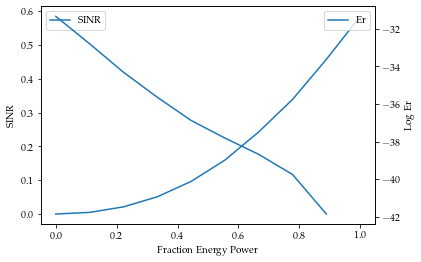

In [ ]:
fig,axs=plt.subplots()

axs.plot(A,sinr.mean(axis=1),label='SINR')
axs1=axs.twinx()
axs1.plot(A,10*np.log10(er.mean(axis=1)/10**-3),label='Er')
axs.legend()
axs1.legend()
axs1.set_ylabel("Log Er")
axs.set_ylabel("SINR")
axs.set_xlabel("Fraction Energy Power")
plt.show()

## Varying Number of IRS & No. of Elements

In [ ]:
NxList,NyList = np.arange(1,11),np.arange(1,11) # Number of reflecting elements (rows,columns)


In [ ]:
n_sim=1000

sinr=np.zeros((10,n_sim))
er=np.zeros((10,n_sim))
for Nx,Ny in zip(NxList,NyList):


    sinr[Nx-1],er[Nx-1]=simulate_irs(Nx=Nx,Ny=Ny,n_sim=n_sim)
    

Text(0, 0.5, 'SINR')

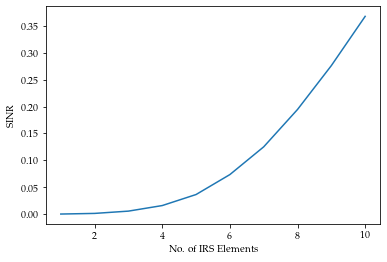

In [ ]:
plt.plot(NxList,sinr.mean(axis=1))
plt.xlabel("No. of IRS Elements")
plt.ylabel("SINR")

Text(0, 0.5, 'ER')

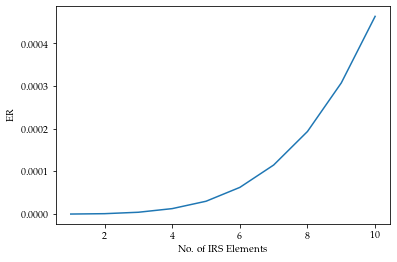

In [ ]:
plt.plot(NxList,er.mean(axis=1))
plt.xlabel("No. of IRS Elements")
plt.ylabel("ER")

Text(0, 0.5, 'Probability of Outage')

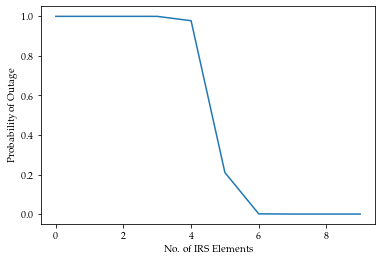

In [ ]:
def pro_outage(x,cutoff=0.00005):
    return (x<cutoff).sum()/x.shape[0]
pr=np.apply_along_axis(pro_outage,1,er)
plt.plot(pr)
plt.xlabel("No. of IRS Elements")
plt.ylabel("Probability of Outage")

In [ ]:
n_sim=1000
sinr=np.zeros((10,n_sim))
er=np.zeros((10,n_sim))
M=np.linspace(10,100,10)
i=0
for m in M:
    sinr[i],er[i]=simulate_irs(M=int(m),n_sim=n_sim)
    i+=1

Text(0, 0.5, 'SINR')

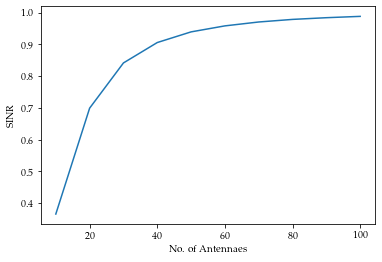

In [ ]:
plt.plot(M,sinr.mean(axis=1))
plt.xlabel("No. of Antennaes")
plt.ylabel("SINR")

Text(0, 0.5, 'ER')

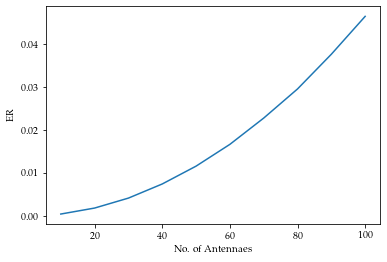

In [ ]:
plt.plot(M,er.mean(axis=1))
plt.xlabel("No. of Antennaes")
plt.ylabel("ER")

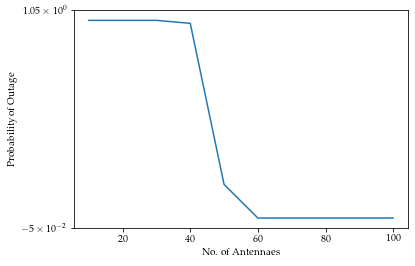

In [ ]:
def pro_outage(x,cutoff=0.01):
    return (x<cutoff).sum()/x.shape[0]
pr=np.apply_along_axis(pro_outage,1,er)
plt.plot(M,pr)
plt.xlabel("No. of Antennaes")
plt.ylabel("Probability of Outage")
plt.yscale("symlog")

### Changing both N&M

In [ ]:
x,y=np.linspace(10,100,5).reshape(5,1),np.linspace(10,20,5).reshape(1,5)
NM=np.array(np.meshgrid(x, y, sparse=False, indexing='ij')).T.reshape(-1,2)


In [ ]:
n_sim=100
sinr=np.zeros((25,n_sim))
er=np.zeros((25,n_sim))
i=0

for n,m in NM:
    sinr[i],er[i]=simulate_irs(M=int(m),Nx=int(n),Ny=int(n),n_sim=n_sim)
    print(i)
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
df=pd.DataFrame({
    'M':NM[:,0],
    'N':NM[:,1],
    'sinr':sinr.mean(axis=1),
    'er':er.mean(axis=1)
})

Text(0, 0.5, 'Energy Received(Log)')

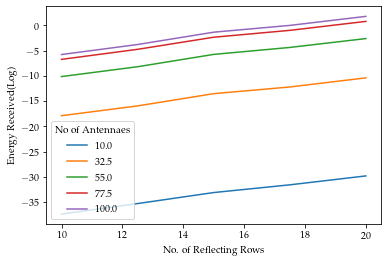

In [ ]:
df.groupby('M').apply(lambda x:plt.plot(x['N'],10*np.log10(x['er']/10**-3),label=x.name))
plt.legend(title="No of Antennaes")
plt.xlabel("No. of Reflecting Rows")
plt.ylabel("Energy Received(Log)")

In [ ]:
v=10
K_e_r=np.linspace(0,100,v)
n_sim=100
sinr=np.zeros((v,n_sim))
er=np.zeros((v,n_sim))
i=0

for k_e_r in K_e_r:
    sinr[i],er[i]=simulate_irs(M=100,k_e_d=k_e_r,n_sim=n_sim)
    i+=1

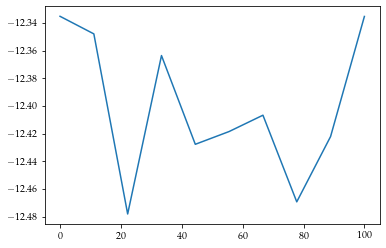

In [ ]:
plt.plot(K_e_r,10*np.log10(er.mean(axis=1)/10**-3))


In [ ]:
# Mathematical Expression Of Probability of Outage


In [ ]:
# Transmit Power Constraint  
# Divided into a 2 user
# How do things change with fraction P 
# SINR vs ER done ->
# A particular M=10,N=5,10,25,
# Vary # of antenne and irs elements together
# Impact of Rice Factor on Er
# Increase of rice factor along Energy reciever -> energy reciever/sinr
# Copy the code into overlead and write the eqn.
# Deterministic Set


In [ ]:
# Make a different G
# Optimize Reflection Phase Matrix such that 

# Will we have a energy of signal term in Er?
- # optimize theta
- # 2 IRS with N/2 element for different type of user close to them 
- # Can we analyse this ?
- # in terms of outage which is better?
- # Optimal phase matrices for each irs surface 

In [ ]:
# How are we doing a different job than them?
# What is the need of precoders?
#
#
#

In [ ]:
probability of outage in energy transfer 


# PDF of rvs involved 
# theta* that minimises P_OutageEnergy
# Optimize the energy received , theta is obtained
# I plug the optimal theta into energy recieved exp
# probability of outage
# Tradeoff - outage vary as a function of energyspent in transmitting pilots
# 

Is optimizing the probability of outage and Outage energy the same thing?

In [ ]:
E_r <= Ec , Er = Ec + Eh

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b319ffc-f2ce-4490-9e28-3a7eb21abad0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>